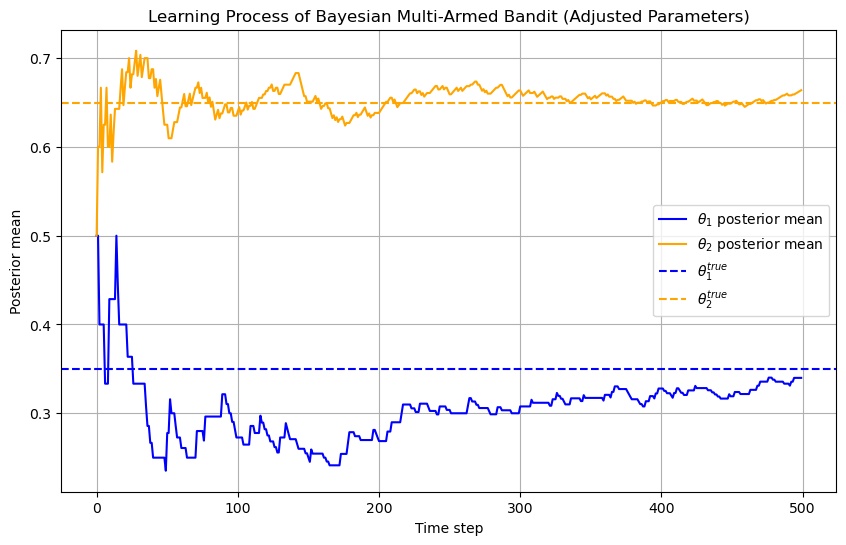

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Setting the parameters for the Bayesian multi-armed bandit problem
np.random.seed(123)  # New seed for variation
true_theta_1 = 0.35  # Adjusted true success probability of arm 1
true_theta_2 = 0.65  # Adjusted true success probability of arm 2
alpha_1, beta_1 = 2, 2  # Adjusted Beta distribution parameters for arm 1
alpha_2, beta_2 = 2, 2  # Adjusted Beta distribution parameters for arm 2
num_trials = 500  # Number of trials

# Arrays to store results
posterior_means_1 = []
posterior_means_2 = []

# Simulation loop
for t in range(num_trials):
    # Calculate the posterior means for both arms
    mean_1 = alpha_1 / (alpha_1 + beta_1)
    mean_2 = alpha_2 / (alpha_2 + beta_2)
    
    # Store the posterior means
    posterior_means_1.append(mean_1)
    posterior_means_2.append(mean_2)
    
    # Simulate pulling an arm based on the current posterior means
    if np.random.rand() < mean_1 / (mean_1 + mean_2):
        reward = np.random.rand() < true_theta_1  # Pull arm 1
        if reward:
            alpha_1 += 1
        else:
            beta_1 += 1
    else:
        reward = np.random.rand() < true_theta_2  # Pull arm 2
        if reward:
            alpha_2 += 1
        else:
            beta_2 += 1

# Plot the learning process
plt.figure(figsize=(10, 6))
plt.plot(range(num_trials), posterior_means_1, label=r'$\theta_1$ posterior mean', color='blue')
plt.plot(range(num_trials), posterior_means_2, label=r'$\theta_2$ posterior mean', color='orange')
plt.axhline(y=true_theta_1, color='blue', linestyle='--', label=r'$\theta_1^{true}$')
plt.axhline(y=true_theta_2, color='orange', linestyle='--', label=r'$\theta_2^{true}$')
plt.title('Learning Process of Bayesian Multi-Armed Bandit (Adjusted Parameters)')
plt.xlabel('Time step')
plt.ylabel('Posterior mean')
plt.legend()
plt.grid()
plt.show()

